<a href="https://colab.research.google.com/github/collinsbett1/Financial-Inclusion-in-East-Africa/blob/main/Financial_Inclusion_in_East_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of the Financial Inclusion Dataset.


## 1. Defining the question.


### a) Specifying the Data Analytic Question

> The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### b) Defining the Metric for Success

### c) Understanding the context

> Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

> Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the data


In [3]:
# Load the relevant dataset
# Dataset url = http://bit.ly/FinancialDataset
#
# Import the required libraries.
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("http://bit.ly/FinancialDataset")

## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
df.shape

(23524, 13)

In [5]:
# Previewing the top of our dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Previewing the bottom of our dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
# Checking whether each column has an appropriate datatype
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [8]:
# Description of the numerical data
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


## 4. External Data Source Validation

## 5. Tidying the Dataset

In [9]:
# drop the unnecessary 'uniqueid' column
df.drop(['uniqueid'], axis = 1, inplace=True)

In [10]:
# Changing column names to lower case
df.columns= df.columns.str.lower()

In [42]:
# Renaming mispelt column names
df = df.rename(columns = {'the_relathip_with_head':'the_relationship_with_head' , 'level_of_educuation':'level_of_education'})

In [43]:
# Replacing spaces in the column names with underscore
df.columns= df.columns.str.replace(" ", "_")

In [44]:
# Identifying the Missing Data
df.isnull().sum()

country                       14
year                           0
has_a_bank_account            36
type_of_location              15
cell_phone_access             11
household_size                28
respondent_age                34
gender_of_respondent          34
the_relationship_with_head     4
marital_status                32
level_of_education            29
type_of_job                   30
dtype: int64

In [45]:
# Dealing with the Missing Data
# Drop the null values since their number is insignificant compared to the size 
# of the dataset
df1 = df.dropna()

In [46]:
# Confirm that null values have been dropped
df1.isnull().sum()

country                       0
year                          0
has_a_bank_account            0
type_of_location              0
cell_phone_access             0
household_size                0
respondent_age                0
gender_of_respondent          0
the_relationship_with_head    0
marital_status                0
level_of_education            0
type_of_job                   0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


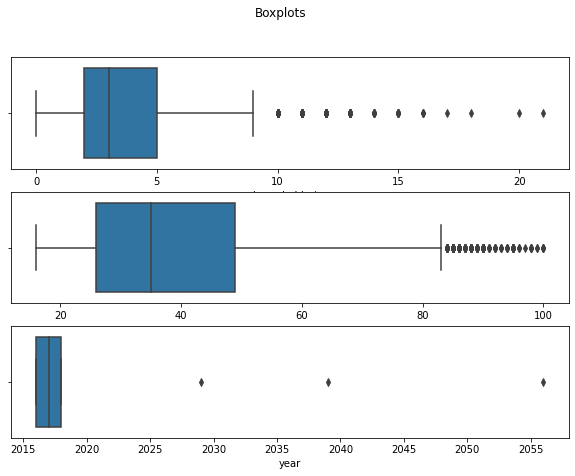

In [47]:
# Checking for Outliers
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df1['household_size'], ax=ax1)
sns.boxplot(df1['respondent_age'], ax=ax2)
sns.boxplot(df1['year'], ax=ax3)
plt.show()


In [48]:
# Checking for anomalies
# in household size
q1_hs = df1['household_size'].quantile(.25)
q3_hs = df1['household_size'].quantile(.75)

iqr_hs = q3_hs - q1_hs

# in respondent age
q1_ra = df1['respondent_age'].quantile(.25)
q3_ra = df1['respondent_age'].quantile(.75)

iqr_ra = q3_ra - q1_ra

# in year
q1_y = df1['year'].quantile(.25)
q3_y = df1['year'].quantile(.75)

iqr_y = q3_y - q1_y
# print the interquatile range for household size and interquatile range
print(iqr_hs, iqr_ra, iqr_y)

3.0 23.0 2.0


In [49]:
# removing anomalies in year
#filter = (df1['year']>q3_y) & (df1['year']<q1_y)
#f1.loc[filter]

In [50]:
df1.year.value_counts()

2016    8683
2018    8157
2017    6500
2029       1
2056       1
2039       1
Name: year, dtype: int64

In [51]:
# Saving the cleaned dataset 
df1.to_csv("newfinacial.csv")

## 6. Exploratory Analysis

### 6.1 Univariate Analysis

#### 6.1.1 Numerical Variables

##### a) Measures of Central Tendancy

In [52]:
# 1. Mean
# Mean of respondent age
df1["respondent_age"].mean()

38.80550914621085

In [53]:
# Mean of household size
df1["household_size"].mean()

3.6886432763569377

In [54]:
# 2. Median
# Median of respondent age
df1["respondent_age"].median()

35.0

In [55]:
# Median of household size
df1["household_size"].median()

3.0

In [56]:
# 3. Mode
# Mode of respondent age 
df1["respondent_age"].mode()

0    30.0
dtype: float64

In [57]:
# Mode of household size
df1["household_size"].mode()

0    2.0
dtype: float64

##### b) Measures of Dispersion

In [58]:
# 1. Standard Deviation
# SD of respondent age
df1["respondent_age"].std()

16.51980349804178

In [59]:
# SD of household size
df1["household_size"].std()

2.2811835250351495

In [60]:
# 2. Variance
# Variance of respondent age
df1["respondent_age"].var()

272.90390761391353

In [61]:
# Variance of household size
df1["household_size"].var()

5.20379827489179

In [62]:
# 3. Range
# Range of respondent age
ra_max = df1["respondent_age"].max()
ra_min = df1["respondent_age"].min()
ra_max - ra_min

84.0

In [63]:
# Range of household size
hs_max = df1["household_size"].max()
hs_min = df1["household_size"].min()
hs_max - hs_min

21.0

In [64]:
# 4. Quantiles
# Quantile of respondent age
df1["respondent_age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64

In [65]:
# Quantiles of household size
df1["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [66]:
# 5. Skewness
# Skewness of respondent age
df1["respondent_age"].skew()

0.840661747532081

In [67]:
# Skewness of household size
df1["household_size"].skew()

0.9741086837897069

In [68]:
# 6. Kurtosis
# Kurtosis of respondent age
df1['respondent_age'].kurt()

0.09844652254807196

In [69]:
# Kurtosis of household size
df1["household_size"].kurt()

1.1538690689335573

#### 6.1.2 Categorical Variables

##### a) Frequency Tables

In [70]:
# Frequency table of cell phone access
df1.cell_phone_access.value_counts()

Yes    17334
No      6009
Name: cell_phone_access, dtype: int64

In [71]:
# Frequency table of level of education
df1.level_of_education.value_counts()

Primary education                  12689
No formal education                 4467
Secondary education                 4207
Tertiary education                  1144
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: level_of_education, dtype: int64

##### b) Bar Chart

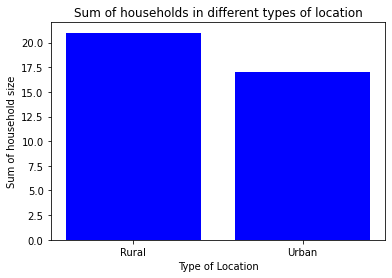

In [72]:
# Bar chart of type of location against size of household
# defining the x and y axis values
location = df1['type_of_location']
size = df1['household_size']
# plottin the bar
plt.bar(location, size, color='blue')
plt.xlabel('Type of Location')
plt.ylabel('Sum of household size')
plt.title('Sum of households in different types of location')
plt.show()

Rural areas had larger households.

##### c) Histograms


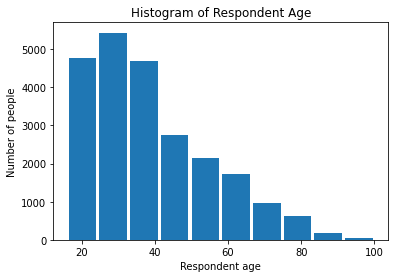

In [73]:
# Histogram of respondent age
# Plotting the histogram
age= df1['respondent_age']
plt.hist(age, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('Respondent age')
plt.ylabel('Number of people')
plt.title('Histogram of Respondent Age') 
plt.show()

Most of the respondents were between 20 to 40 years old.

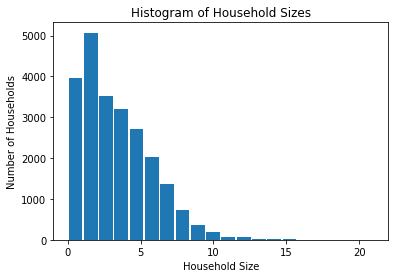

In [74]:
# Histogram of household size
# Plotting the histogram
size= df1['household_size']
plt.hist(size, bins=20, histtype='bar', rwidth=0.9)

plt.xlabel('Household Size')
plt.ylabel('Number of Households')
plt.title('Histogram of Household Sizes') 
plt.show()

### 6.2 Bivariate Analysis

#### 6.2.1 Numerical and Numerical

##### a) Scatter Plot

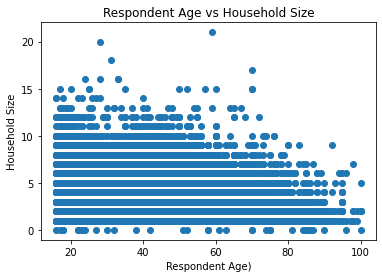

In [75]:
# Scatter plot between respondent age and household size
#  Using Matplotlib: Plotting our scatterplot to compare the variables
plt.scatter(df1["respondent_age"] , df1["household_size"])
# Giving our scatterplot a title
plt.title('Respondent Age vs Household Size')

# Labelling our x axis
plt.xlabel('Respondent Age)')

# Labelling our y axis
plt.ylabel('Household Size')

# We then display our scatterplot as shown below
plt.show()


##### b) Correlation

In [76]:
# Correlation coefficient between respondent age and household size
df1['respondent_age'].corr(df1['household_size'])

-0.11970919507762415

Respondent age and household size have a low correlation.

#### 6.2.2 Categorical and Categorical

##### a) Stacked Column Chart

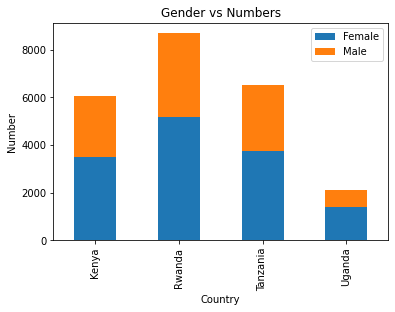

In [77]:
# Stacked bar of country and gender
pd.crosstab(df1['country'], df['gender_of_respondent']).plot(kind='bar', stacked=True)

# Labeling our y axis
plt.ylabel("Number")

# Labeling our x axis
plt.xlabel("Country")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Gender vs Numbers")

# Displaying our chart
plt.show()

A majority of the respondents were male in all the four countries. Rwanda had the highest number of respondents.  

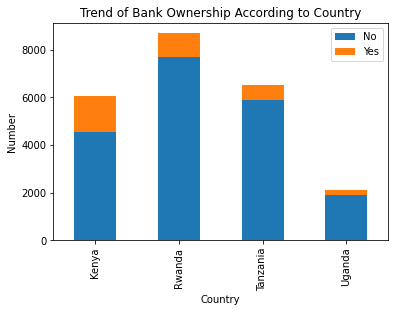

In [135]:
# Stacked bar of country and ownership of a bank account.
pd.crosstab(df1['country'], df['has_a_bank_account']).plot(kind='bar', stacked=True)
# Labeling our y axis
plt.ylabel("Number")

# Labeling our x axis
plt.xlabel("Country")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Trend of Bank Ownership According to Country")

# Displaying our chart
plt.show()

Less than half of the respondents in all countries did not have a bank account.

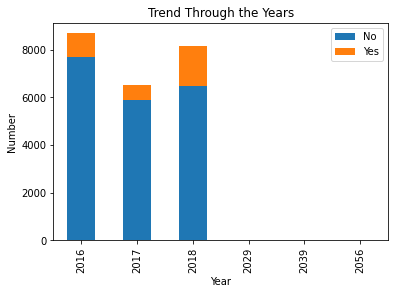

In [78]:
# Stacked bar of year and ownership of a bank account.
pd.crosstab(df1['year'], df['has_a_bank_account']).plot(kind='bar', stacked=True)

# Labeling our y axis
plt.ylabel("Number")

# Labeling our x axis
plt.xlabel("Year")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Trend Through the Years")

# Displaying our chart
plt.show()

Most of the respondents did not have a bank account.

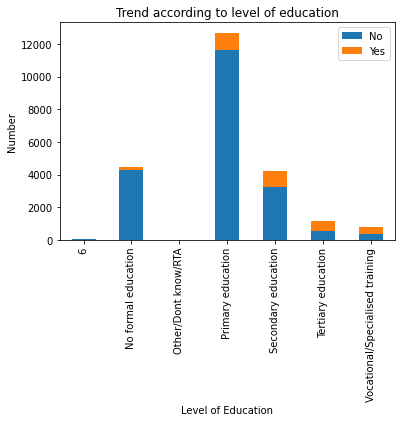

In [79]:
# Stacked bar of level of education and ownership of a bank account.
pd.crosstab(df1['level_of_education'], df['has_a_bank_account']).plot(kind='bar', stacked=True)
# Labeling our y axis
plt.ylabel("Number")

# Labeling our x axis
plt.xlabel("Level of Education")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Trend according to level of education")

# Displaying our chart
plt.show()

Respondents with secondary education and lower had a majority that did not have back accounts. Half of the respondents that had tertiary, vocational and specialised training had bank accounts.

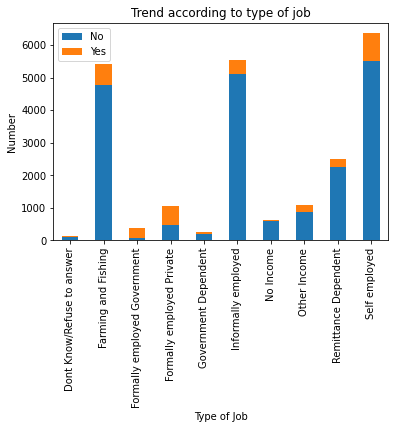

In [80]:
# Stacked bar of type of job and ownership of a bank account.
pd.crosstab(df1['type_of_job'], df['has_a_bank_account']).plot(kind='bar', stacked=True)
# Labeling our y axis
plt.ylabel("Number")

# Labeling our x axis
plt.xlabel("Type of Job")

# Creating a key/legend for our chart
plt.legend(loc="upper left")

# Adding a title
plt.title("Trend according to type of job")

# Displaying our chart
plt.show()

Of the respondents that were formally employed private, half had a bank account. More than half of those identifying as formally employed government had bank accounts. The rest all had less than half owning bank accounts.

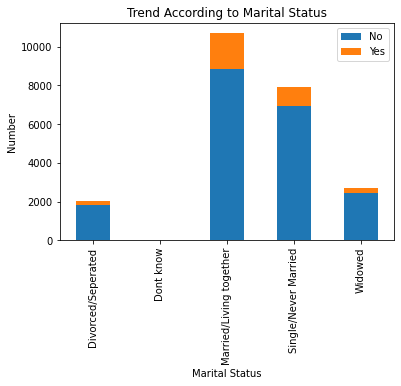

In [81]:
# Stacked bar of marital status and ownership of a bank account.
pd.crosstab(df1['marital_status'], df['has_a_bank_account']).plot(kind='bar', stacked=True)
# Labeling our y axis
plt.ylabel("Number")

# Labeling our x axis
plt.xlabel("Marital Status")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Trend According to Marital Status")

# Displaying our chart
plt.show()

#### 6.2.3 Categorical and Numerical

##### a) Line Charts

##### b) Z-test

##### c) T-test

### 6.3 Multivariate Analysis


In order to perform multivariate analysis we will need to convert the categorical data to numerical data.

In [112]:
# we will convert the categorical data to numerical data using label encoder
# First, we will import LabelEncoder
from sklearn.preprocessing import LabelEncoder



In [113]:
# encoding all the columns
new_df1 = df1.apply(LabelEncoder().fit_transform)
new_df1.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,0,2,1,0,1,3,8,0,5,2,4,9
1,0,2,0,0,0,5,54,0,1,4,1,4
2,0,2,1,1,1,5,10,1,3,3,6,9
3,0,2,0,0,1,5,18,0,1,2,3,3
4,0,2,0,1,0,8,10,1,0,3,3,5


#### 6.3.1 Principal Component Analysis

In [114]:
# Preprocessing
# Divide the dataset into features and corresponding labels.

X = new_df1.values
y = new_df1.has_a_bank_account

In [127]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [116]:
# Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [117]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [118]:
# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.16343784, 0.15311393, 0.13247322, 0.09845573, 0.08419559,
       0.07128187, 0.06519117, 0.06041056, 0.05485713, 0.04334287,
       0.03805362, 0.03518646])

In [119]:
# Using 1 Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=0)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [128]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [125]:
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[3993   15]
 [ 615   46]]
Accuracy 0.8650674662668666


#### 6.3.2 Linear Discriminant Analysis

In [129]:
# Divide the dataset into features and corresponding labels.
X = new_df1.values
y = new_df1.has_a_bank_account

In [130]:
# Divide data into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [131]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [132]:
# Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [133]:
# Training and making predictions.
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [134]:
# Evaluating Performance.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[4008    0]
 [   0  661]]
Accuracy1.0


## 7. Implementing the solution.

## 8. Challenging the solution


## 9. Follow up questions

### a) Did we have the right data

### b) Did we have the right question?